# 1

## a)

In [191]:
import pandas as pd
import numpy as np
url = 'http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data'
df = pd.read_csv(url, sep='\t', header=0)
df = df.drop('Unnamed: 0', axis=1)
istrain_str = df['train']
istrain = np.asarray([True if s == 'T' else False for s in istrain_str])
istest = np.logical_not(istrain)
df = df.drop('train', axis=1)

#print df

## b)

In [189]:
#df.shape
#df.info()
#df.describe()

## c)

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['lpsa'] = df['lpsa']

# print df_scaled

## d)

In [193]:
import sklearn.linear_model as lm
X = df_scaled.ix[:,:-1]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['lpsa']
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

## e)

In [252]:
#print linreg.coef_

cols = list(Xtrain.columns)
cols.remove("intercept")

Xtrain_zscores = pd.DataFrame()

for col in cols:
    col_zscore = col + '_zscore'
    Xtrain_zscores[col_zscore] = (Xtrain[col] - Xtrain[col].mean())/Xtrain[col].std(ddof=0)
    
    
#zscore_matrix = Xtrain_zscores.as_matrix().transpose().tolist()

## f)

In [257]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
mse_test_p = np.mean(np.absolute((yhat_test - ytest)*(100/ytest)))
from sklearn import cross_validation
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

print mse_test
print mse_test_p
print

K=5
k_fold = cross_validation.KFold(len(Xm),K)
mse_cv = 0
mse_cv_p = 0
for k, (train, val) in enumerate(k_fold):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_fold_p = np.mean(np.absolute((yhat_val - ym[val])*(100/ym[val])))
    mse_cv += mse_fold
    mse_cv_p += mse_fold_p
mse_cv = mse_cv / K
mse_cv_p = mse_cv_p / K

print mse_cv
print mse_cv_p
print

K=10
k_fold = cross_validation.KFold(len(Xm),K)
mse_cv = 0
mse_cv_p = 0
for k, (train, val) in enumerate(k_fold):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_fold_p = np.mean(np.absolute((yhat_val - ym[val])*(100/ym[val])))
    mse_cv += mse_fold
    mse_cv_p += mse_fold_p
mse_cv = mse_cv / K
mse_cv_p = mse_cv_p / K

print mse_cv
print mse_cv_p

0.509630811022
22.4762702314

0.956514631616
84.3625056948

0.757237472963
72.3234399351


## g)

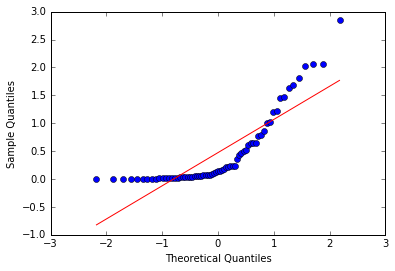

In [271]:
%matplotlib inline

import statsmodels.api as sm
import pylab

yhat_train = linreg.predict(Xtrain)
mse_train = np.power(yhat_train - ytrain, 2)

sm.qqplot(mse_train, line='r')
pylab.show()

#asimetrica a la izquierda

# 2